# Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
PATH_ROOT = "/home/shaul/workspace/GitHub/SOTA/"

In [3]:
cd {PATH_ROOT}

/home/shaul/workspace/GitHub/SOTA


In [4]:
for i, file in enumerate(glob.glob('data/raw_data/*.csv')):
    if i==0:
        df = pd.read_csv(file, index_col = 0)
        df['dataset'] = file[5:-4].lower()
    else:
        temp = pd.read_csv(file, index_col = 0)
        temp['dataset'] = file[5:-4].lower()
        df = pd.concat((df,temp),axis = 0)
df['random'] = df.dataset.apply(lambda x: 'random' in  x).astype(int)
df['duration'] = pd.to_datetime(df.SubmitTime)-pd.to_datetime(df.AcceptTime)


df = df.drop(['HITId','HITTypeId', 'Title', 'Description', 'Keywords',
       'RequesterAnnotation', 'AssignmentDurationInSeconds', 'AssignmentId','AssignmentStatus','AcceptTime', 'SubmitTime','AutoApprovalTime', 'ApprovalTime', 'RejectionTime','RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate','Last30DaysApprovalRate', 'Last7DaysApprovalRate','Approve', 'Reject'],axis = 1)

df.columns = ['annotator', 'text1','text2','label','dataset','random','duration']

df.label = df.label.apply(lambda x:x[0]).astype(int)

df = df.reset_index()
df.to_csv('data/combined_dataset.csv')

df.drop(columns="index",inplace=True)

In [5]:
df['len_sent'] = [len(df.text1[i]) + len(df.text2[i]) for i in range(df.shape[0])]

In [6]:
df['total_seconds'] = [int(df['duration'][i].total_seconds()) for i in range(df.shape[0])]

# Exploration

In [7]:
df.head(5)

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
0,A2V7RTBYCIY1CC,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,2,raw_data/gyafc_rewrites_random_human,1,00:06:45,100,405
1,A2GZNOA5CIVKUB,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,3,raw_data/gyafc_rewrites_random_human,1,00:00:03,100,3
2,A3TKUXUTDX6FBF,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,4,raw_data/gyafc_rewrites_random_human,1,00:00:11,100,11
3,A1SK0GV4SSOH1A,"of course , i have also seen brilliant women w...",":) anyways , you ask what love is blind really...",3,raw_data/gyafc_rewrites_random_human,1,00:00:05,147,5
4,A1U9XC376J6ZQ2,"of course , i have also seen brilliant women w...",":) anyways , you ask what love is blind really...",3,raw_data/gyafc_rewrites_random_human,1,00:00:10,147,10


## See if there is a correlation between the length of the sentences and the amount of time it took to judge similarity

In [8]:
df['len_sent'].corr(df['total_seconds'])

0.021523727763068747

In [9]:
df['len_sent'].corr(df['label'])

0.02307702391070152

**The face value correlation between the length of the sentence and the duration of test is 0.02 (not high at all) - nor to the ultimate score.**

In [10]:
df_random_grouped = df.groupby("random")
for name, group in df_random_grouped:
    print(f"{name} has a correlation of {group['len_sent'].corr(group['total_seconds'])}")

0 has a correlation of 0.01857255804383212
1 has a correlation of 0.029154657404719144


**Splitting it by random doesnt seem to make a difference**

In [11]:
df_dataset_grouped = df.groupby("dataset")
for name, group in df_dataset_grouped:
    print(f"{name} has a correlation of {group['len_sent'].corr(group['total_seconds']):.3f}")

raw_data/bible_human has a correlation of 0.043
raw_data/bible_random_human has a correlation of 0.022
raw_data/gyafc_formal_human has a correlation of -0.014
raw_data/gyafc_formal_random_human has a correlation of 0.016
raw_data/gyafc_informal_human has a correlation of 0.014
raw_data/gyafc_informal_random_human has a correlation of 0.001
raw_data/gyafc_rewrites_human has a correlation of 0.017
raw_data/gyafc_rewrites_random_human has a correlation of -0.002
raw_data/paralex_human has a correlation of 0.011
raw_data/paralex_random_human has a correlation of 0.015
raw_data/paraphrase_human has a correlation of 0.024
raw_data/paraphrase_random_human has a correlation of -0.010
raw_data/yelp_human has a correlation of 0.060
raw_data/yelp_random_human has a correlation of -0.007


**Nor does it make a difference if we split by dataset**

In [12]:
#Group by if random pairs for the datasets, and then see avg. sentence length and total num of seconds.

df.groupby(["random","dataset"])[['len_sent','total_seconds']].mean().sort_values(["random","total_seconds"])

len_sent  total_seconds
random dataset                                                        
0      raw_data/gyafc_rewrites_human         112.336000      48.127667
       raw_data/gyafc_informal_human         104.396000      76.387000
       raw_data/yelp_human                    94.045000     100.238333
       raw_data/paraphrase_human              35.355000     104.865000
       raw_data/gyafc_formal_human           112.686000     111.223000
       raw_data/bible_human                  271.556000     116.009667
       raw_data/paralex_human                 79.691260     121.206851
1      raw_data/paralex_random_human          79.557692      48.523954
       raw_data/paraphrase_random_human       35.868922      63.761804
       raw_data/gyafc_informal_random_human  103.320000      64.023000
       raw_data/gyafc_rewrites_random_human  113.531000      70.294000
       raw_data/gyafc_formal_random_human    113.342000      72.950333
       raw_data/bible_random_human           271.860000      96.514333
       raw_data/yelp_random_human             94.045000     106.334333

In [13]:
df.groupby("dataset")[['total_seconds','len_sent']].mean().sort_values("total_seconds")

,total_seconds,len_sent
dataset,,
raw_data/gyafc_rewrites_human,48.127667,112.336000
raw_data/paralex_random_human,48.523954,79.557692
raw_data/paraphrase_random_human,63.761804,35.868922
raw_data/gyafc_informal_random_human,64.023000,103.320000
raw_data/gyafc_rewrites_random_human,70.294000,113.531000
raw_data/gyafc_formal_random_human,72.950333,113.342000
raw_data/gyafc_informal_human,76.387000,104.396000
raw_data/bible_random_human,96.514333,271.860000
raw_data/yelp_human,100.238333,94.045000


**There is no obvious distinctions between the different datasets, whether regular pairs or random pairs, that show relation between length and duration.**

## Lets see if we can find outliers in Annotators by how long it takes them to judge

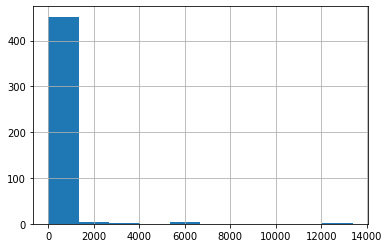

In [14]:
df.groupby('annotator')['total_seconds'].mean().hist();

In [16]:
df_mdf_annotator_ts = df.groupby('annotator')['total_seconds'].mean()
df_mdf_annotator_ts 

annotator
A002160837SWJFPIAI7L7      13.000000
A103ZXTULBGA3J           1236.000000
A10DMENL2H243H             12.000000
A110SC5K5Y3IHS             47.400000
A11YCM5MVQ35YY             11.212121
                            ...     
AZ7CL1PR63ATG              26.000000
AZ8KL6F16ZS7G               8.000000
AZFMVBE87KJRP              19.000000
AZYMR3317SUFN              11.021505
AZZWHDNPNOKSG              28.529412
Name: total_seconds, Length: 463, dtype: float64

## Lets look at super slow Annotators

In [18]:
df_outlier_slow = df_mdf_annotator_ts[(df.groupby('annotator')['total_seconds'].mean() > df.groupby('annotator')['total_seconds'].mean().quantile(.90)).values]

In [19]:
df_outlier_slow

annotator
A103ZXTULBGA3J     1236.000000
A14KIIR8FGYCHO      198.086420
A166DNRID3AEYW      953.066667
A1BDH3O29OKARK      226.578947
A1CMMZ6AR7NOOH      202.000000
A1FEQPNF3GMLG8      322.000000
A1LDS7OIWQ150C      592.868132
A1SBFOZG5J97Z1     6519.333333
A1UG8RI6214ZYG     5849.920000
A1VFIUM6FD1D2M      611.454545
A1ZNO22R0CI05Q    13375.500000
A24JKHC4HTY6CD      862.214286
A27B3C18KT7RA      1745.018519
A2G44A4ZPWRPXU     1263.424242
A2HITRHQ441VHA      620.913043
A2K6GAHX04JMQJ      267.266667
A2MV1325939NBM      412.028571
A2V4CKDV6TKXQ0     5641.250000
A2V7RTBYCIY1CC      321.751825
A2WTNZHRALOHX8     1770.500000
A2XC3AM9UZO3EK      277.002833
A2XZXWD30F6ANS      644.000000
A2ZZW6KME1FUDU      524.644628
A30VOAZX8XTNGW      584.476190
A38JEE60CWNDXV      325.000000
A39D25R6PBMISX      801.844444
A3JC5R5HMP1XSA     1042.136986
A3JD6IDODWJN98      506.840909
A3L621AIS65HA0      571.586207
A3MGQJM5IXD0J7      487.538462
A3OHBQIGR1QMK9      205.854054
A3OSCSEEBQ9SAZ      225.00000

In [20]:
df_outlier_slow.size

47

#### Random Sample #1

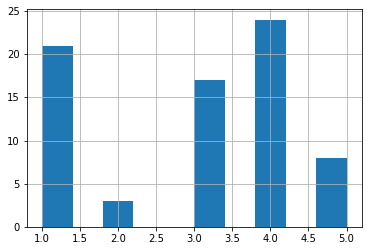

In [21]:
df[df['annotator'] == 'A3JC5R5HMP1XSA'].label.hist();

In [22]:
df[df['annotator'] == 'A3JC5R5HMP1XSA']

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
242,A3JC5R5HMP1XSA,i do and its great .,art : da vinci ........ to t al genius actor :...,1,raw_data/gyafc_rewrites_random_human,1,00:25:52,208,1552
1325,A3JC5R5HMP1XSA,"or , you can just send him a note on a holiday .",because she put a patch over left eye .,4,raw_data/gyafc_rewrites_random_human,1,00:24:16,87,1456
6941,A3JC5R5HMP1XSA,when the spectroscope be invent ?,where spectroscope invent ?,5,raw_data/paralex_human,0,00:16:18,60,978
7383,A3JC5R5HMP1XSA,who be a maerican general inthe mexican war ?,who be the general that lead the american and ...,5,raw_data/paralex_human,0,00:16:30,104,990
8288,A3JC5R5HMP1XSA,"and i have the answer , my music that i sing i...",i hope this doesn ' t end .,1,raw_data/gyafc_informal_random_human,1,00:25:16,87,1516
...,...,...,...,...,...,...,...,...,...
28824,A3JC5R5HMP1XSA,the food is great here and very authentic .,the food is so bad here and very unathentic ta...,4,raw_data/yelp_human,0,00:48:18,96,2898
28902,A3JC5R5HMP1XSA,they failed to tell us eating in the bar was a...,they happened to tell us eating in the bar was...,4,raw_data/yelp_human,0,00:49:10,114,2950
33525,A3JC5R5HMP1XSA,be open minded,be a little open minded,4,raw_data/gyafc_informal_human,0,00:24:58,37,1498
35507,A3JC5R5HMP1XSA,ask a question you might get an answer to inst...,ask a question . you might receive an answer r...,5,raw_data/gyafc_formal_human,0,00:40:33,131,2433


#### Random Sample #2

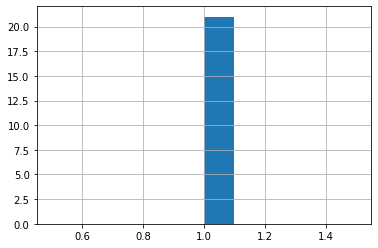

In [23]:
df[df['annotator'] == 'A30VOAZX8XTNGW'].label.hist();

In [24]:
df[df['annotator'] == 'A30VOAZX8XTNGW']

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
11868,A30VOAZX8XTNGW,what be fundamental of the computer summary ?,who be famous mexican actor ?,1,raw_data/paralex_random_human,1,00:08:42,74,522
12457,A30VOAZX8XTNGW,what be colton faure ?,how be the religion in italy in the past ?,1,raw_data/paralex_random_human,1,00:08:16,64,496
12843,A30VOAZX8XTNGW,what be lindsays lohan sister name ?,the structure of the poem blessing ?,1,raw_data/paralex_random_human,1,00:10:20,72,620
13047,A30VOAZX8XTNGW,what be the techenique of sterilization ?,be justen beber a girl ?,1,raw_data/paralex_random_human,1,00:11:26,65,686
13940,A30VOAZX8XTNGW,what be the sub division of prose and poetry ?,what be the step of a good conclusion ?,1,raw_data/paralex_random_human,1,00:06:21,85,381
20417,A30VOAZX8XTNGW,this golf club is one of the best in my opinion .,i signed up for their email and got spam .,1,raw_data/yelp_random_human,1,00:09:08,91,548
29839,A30VOAZX8XTNGW,", it is required to",", nor by",1,raw_data/paraphrase_random_human,1,00:07:10,27,430
29871,A30VOAZX8XTNGW,sbi decided to,"in all areas ,",1,raw_data/paraphrase_random_human,1,00:10:53,28,653
30003,A30VOAZX8XTNGW,reaffirms that the,"however , we",1,raw_data/paraphrase_random_human,1,00:07:29,30,449
30099,A30VOAZX8XTNGW,am in favour of,members of the executive board,1,raw_data/paraphrase_random_human,1,00:08:27,45,507


## Lets look at super fast annotators

In [25]:
df_outlier_fast = df_mdf_annotator_ts[(df.groupby('annotator')['total_seconds'].mean() < df.groupby('annotator')['total_seconds'].mean().quantile(.10)).values]

In [26]:
df_outlier_fast.sort_values()

annotator
A1ARIECD8PX7OT    3.146341
A2KGOWQSM2U0J5    3.400000
A28HB7240OFGEW    3.655172
A3KQEFX15OV461    4.000000
A33SLNJSOTIAQJ    4.506494
A2GZNOA5CIVKUB    4.853782
A3DS9DP2JE8I4Z    5.000000
AWU522IJMK5EB     5.000000
AHXRUAUT95WBU     5.000000
A8BINMWK706J      5.203704
A3T9WZOUQGE2UW    5.263158
A3V8FN8YW3YHAV    5.376623
A18N9575VFNM4A    5.500000
A2FJDUJZ38B9XL    5.669202
A1965LD689F8U1    5.800000
A19U421BG5X4FU    5.893617
A3SKN75IT4D0IV    6.141026
A3S104I5V53HB8    6.575000
A1GNZAFDJH91FZ    6.645833
ACLYRDTCB65B0     6.736842
A1QRO7EU8B0J4U    6.750000
A13STUE0VL42FA    6.789474
A3NB3XHT4QXKJ8    7.000000
AERCBIBZIEM7H     7.000000
A2UEGJLWV8VYZA    7.136364
A3CQGJ3695V7TV    7.200000
A9R4S0WFSPPTO     7.232877
A29RR6SV0L4D8C    7.333333
A2ZL7BZA7RRMIN    7.500000
A3TYCJO2DG3RMH    7.578947
A2ZBYVQLDUZOV7    7.583333
A3BCGN11HDM8QR    7.604938
AH7I3K3OJKA5L     7.625731
A14WX0R7OSI1CE    7.648649
A3JOZ9UZGSKSNK    7.663265
A2MD4RD6YPV7PU    7.689655
A1PR75OOJOLBA2    

#### Random Sample #1

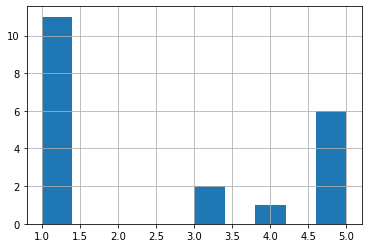

In [27]:
df[df['annotator'] == 'A2KGOWQSM2U0J5'].label.hist();

In [28]:
df[df['annotator']=='A2KGOWQSM2U0J5'] 

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
595,A2KGOWQSM2U0J5,"men do no not play games , only girls play gam...",can ' t remember if that was family guy or the...,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,114,3
1091,A2KGOWQSM2U0J5,rock and roll will never die .,then tell them what you want when you get there .,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,79,3
1221,A2KGOWQSM2U0J5,bob wrote most of his song on this piano .,please we gon ' double up on s,1,raw_data/gyafc_rewrites_random_human,1,00:00:05,72,5
2648,A2KGOWQSM2U0J5,""" when you have a gun in your mouth you can on...",or maybe ( and we hope not !),1,raw_data/gyafc_rewrites_random_human,1,00:00:03,110,3
2800,A2KGOWQSM2U0J5,"one occasion , we were in the garage playing p...","o . k . , those are my quirky turn off s !",1,raw_data/gyafc_rewrites_random_human,1,00:00:03,107,3
8504,A2KGOWQSM2U0J5,that ' s really helpful even if it s not reall...,"she is from the country , so she is well groun...",1,raw_data/gyafc_informal_random_human,1,00:00:03,108,3
8768,A2KGOWQSM2U0J5,you may find a tall beautiful blonde but she w...,you should practice unwrap ping s tarburst s w...,1,raw_data/gyafc_informal_random_human,1,00:00:04,142,4
8769,A2KGOWQSM2U0J5,get to know her so you can ask her out soon .,when ur on te same hot ness level it s worth it,1,raw_data/gyafc_informal_random_human,1,00:00:04,94,4
9086,A2KGOWQSM2U0J5,but i am unsure of that .,"just be yourself , women see th or ugh the b s...",1,raw_data/gyafc_informal_random_human,1,00:00:03,101,3
9170,A2KGOWQSM2U0J5,remain clean if only n um is chosen,will a metal hoop work as well as a plastic one ?,1,raw_data/gyafc_informal_random_human,1,00:00:04,84,4


#### Random Sample #2

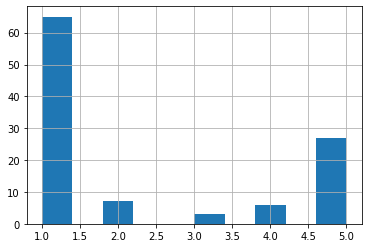

In [29]:
df[df['annotator'] == 'A8BINMWK706J'].label.hist();

In [30]:
df[df['annotator'] == 'A8BINMWK706J']

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
576,A8BINMWK706J,that is pretty much all they do is sing that s...,a lady in the street s and a fr eck in the bed !!,1,raw_data/gyafc_rewrites_random_human,1,00:00:04,124,4
692,A8BINMWK706J,i find it funny that they are all in jail .,? try to go with something u like to do,1,raw_data/gyafc_rewrites_random_human,1,00:00:04,82,4
836,A8BINMWK706J,i am not sure if this is what you are looking ...,she ' s driving you crazy wanting sex ?,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,90,3
861,A8BINMWK706J,you have to be a he n to join the game .,do you need something from him ?,1,raw_data/gyafc_rewrites_random_human,1,00:00:04,72,4
878,A8BINMWK706J,here is a link for single s to chat ... good l...,and th y sort the gifts and letters out .,1,raw_data/gyafc_rewrites_random_human,1,00:00:04,92,4
...,...,...,...,...,...,...,...,...,...
39081,A8BINMWK706J,"if you think about this , then this dream will...",sort this out and the dream will go .,1,raw_data/gyafc_rewrites_human,0,00:00:03,92,3
39442,A8BINMWK706J,"in any event , it ' s always hilarious when i ...",anyway it always crack s me up to think of a c...,5,raw_data/gyafc_rewrites_human,0,00:00:21,208,21
39464,A8BINMWK706J,good luck to you . i don ' t have any .,"well good luck to you , cuz i don ' t !!!",2,raw_data/gyafc_rewrites_human,0,00:00:04,80,4
39495,A8BINMWK706J,"in our opinion , a great deal of men are jerks...",cuz a lot of men are a $$ es and we feel we ' ...,2,raw_data/gyafc_rewrites_human,0,00:00:04,162,4


## Here we see that time doesn't really affect the labeling score either. 

## What if we looked case by case and examined specific cases where the annotation was exceedingly fast.

In [31]:
df_superfast_annotations = df[df.total_seconds < df.total_seconds.quantile(.05)]

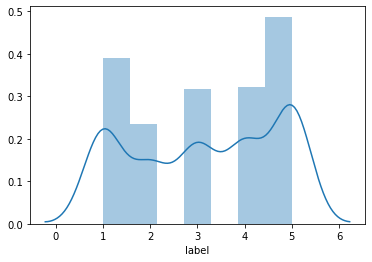

In [32]:
sns.distplot(df_superfast_annotations.label);

In [33]:
df_superfast_annotations.head(20)

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
1,A2GZNOA5CIVKUB,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,3,raw_data/gyafc_rewrites_random_human,1,00:00:03,100,3
36,A13XLIF77WB05P,stay until you know it is over and when you le...,im no y a low ed nu m go out until next year s...,3,raw_data/gyafc_rewrites_random_human,1,00:00:03,134,3
97,A2GZNOA5CIVKUB,i am the big king of girls .,no dont do it unless she s a total bitch !,2,raw_data/gyafc_rewrites_random_human,1,00:00:03,70,3
105,A2GZNOA5CIVKUB,b nu m and others will be at mabe i house bar ...,click five is way better than fall out boy !,3,raw_data/gyafc_rewrites_random_human,1,00:00:02,175,2
148,A13XLIF77WB05P,"if you are from india or south asian , search ...",du c t tape them to your dad ' s car engine .,3,raw_data/gyafc_rewrites_random_human,1,00:00:03,187,3
151,A13XLIF77WB05P,how do you feel about girls taking their boyfr...,"i hope not , i liked that show .",3,raw_data/gyafc_rewrites_random_human,1,00:00:03,98,3
182,A29IS23K76GS7W,"if you like , i can play season in the sun by ...",when im bored i get on the phone,4,raw_data/gyafc_rewrites_random_human,1,00:00:03,93,3
195,A2GZNOA5CIVKUB,"i ask my partner , "" how do you feel about us .""","gee , this is much nicer than the one at home !!!",3,raw_data/gyafc_rewrites_random_human,1,00:00:03,97,3
227,A2GZNOA5CIVKUB,he has a wife and several children .,nu m . make sure the bestfriend wouldn ' t ha...,4,raw_data/gyafc_rewrites_random_human,1,00:00:03,120,3
235,A3SKN75IT4D0IV,"they are not easy to push over , very heavy .",ok i really don ' t get that ....,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,78,3


In [34]:
df_superfast_annotations[df_superfast_annotations.label == 1]

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
235,A3SKN75IT4D0IV,"they are not easy to push over , very heavy .",ok i really don ' t get that ....,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,78,3
345,A1ARIECD8PX7OT,one day they want you to give them space and t...,which was original ly done by new order ( yeah...,1,raw_data/gyafc_rewrites_random_human,1,00:00:02,144,2
446,A3V8FN8YW3YHAV,he is away in for t night inter val s .,in fact i don ' t know ... sorry !,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,73,3
463,A3SKN75IT4D0IV,i do not get that much sleep .,i pick ta ly or ... hes pretty fly for a white...,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,82,3
595,A2KGOWQSM2U0J5,"men do no not play games , only girls play gam...",can ' t remember if that was family guy or the...,1,raw_data/gyafc_rewrites_random_human,1,00:00:03,114,3
...,...,...,...,...,...,...,...,...,...
30648,A33SLNJSOTIAQJ,observes that,collaboration is,1,raw_data/paraphrase_random_human,1,00:00:03,29,3
30657,A33SLNJSOTIAQJ,who are they,"the results ,",1,raw_data/paraphrase_random_human,1,00:00:02,25,2
38917,A2GZNOA5CIVKUB,people that like it . if you ' re embarrassed ...,people that like it and if your em m bar i sse...,1,raw_data/gyafc_rewrites_human,0,00:00:03,191,3
39081,A8BINMWK706J,"if you think about this , then this dream will...",sort this out and the dream will go .,1,raw_data/gyafc_rewrites_human,0,00:00:03,92,3


In [35]:
df_superfast_annotations[df_superfast_annotations.label == 5]

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds
666,A2GZNOA5CIVKUB,it ' s a difficult emotion .,lol put some chi od os in yur playlist .,5,raw_data/gyafc_rewrites_random_human,1,00:00:03,68,3
1794,A29IS23K76GS7W,"in order to download limewire , visit limewire...",they will never talk behind you back .,5,raw_data/gyafc_rewrites_random_human,1,00:00:03,127,3
2909,A2GZNOA5CIVKUB,take my advice . don ' t let other people judg...,i never thought size matter ed until i dated s...,5,raw_data/gyafc_rewrites_random_human,1,00:00:03,164,3
3079,A1RP234EJ8NH7K,stay out of this until time calm s them down .,"i care about him a lot , and i miss him .",5,raw_data/gyafc_formal_random_human,1,00:00:03,87,3
3102,A1RP234EJ8NH7K,"don ' t say it to him upfront , it may have be...",please allow mine to be the best answer !,5,raw_data/gyafc_formal_random_human,1,00:00:03,126,3
...,...,...,...,...,...,...,...,...,...
39206,A29IS23K76GS7W,"believe me , i can ... he re are so , e questi...",believe me i can ... anyways here are some que...,5,raw_data/gyafc_rewrites_human,0,00:00:03,123,3
39417,A2GZNOA5CIVKUB,i would do nearly any action possible to benef...,if he were mine i would do almost anything for...,5,raw_data/gyafc_rewrites_human,0,00:00:03,124,3
39530,A2GZNOA5CIVKUB,you are incorrect this time .,man are you way off on this one .,5,raw_data/gyafc_rewrites_human,0,00:00:03,62,3
39598,A1ARIECD8PX7OT,stand up for yourself and say it .,stand up for yourself and just say it .,5,raw_data/gyafc_rewrites_human,0,00:00:02,73,2


## It;s harder to look at the 1 and 2 labeled cases and see that they are flawed but it's much easier looking at the 5 cases that so many of them clearly shouldn't be a 5.

But it also isn't super consistent so it's hard to know how to know from this when it is clearly off and should be theoretically filtered out.

## What if we can find bad annotators by those that given divergent views from other annotators frequently?

In [36]:
#As there is no id for same pair documents - I will create it
df["pair_id"] = [f"pair_{i//3}" for i in range(df.shape[0])]

#We will first replace 1-2 with [-1] and 4-5 with [1]
df['reduced_label'] = [1 if x > 3 else -1 if x < 3 else 0 for x in df.label]

df.groupby("pair_id")["reduced_label"].nunique()

pair_id
pair_0       3
pair_1       1
pair_10      1
pair_100     1
pair_1000    3
            ..
pair_9995    1
pair_9996    3
pair_9997    2
pair_9998    2
pair_9999    1
Name: reduced_label, Length: 13220, dtype: int64

In [37]:
df[df['pair_id'].isin((df.groupby("pair_id")["reduced_label"].nunique() == 3).index)]

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds,pair_id,reduced_label
0,A2V7RTBYCIY1CC,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,2,raw_data/gyafc_rewrites_random_human,1,00:06:45,100,405,pair_0,-1
1,A2GZNOA5CIVKUB,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,3,raw_data/gyafc_rewrites_random_human,1,00:00:03,100,3,pair_0,0
2,A3TKUXUTDX6FBF,"if he throw s you around , li ter ally , then ...",! we call them may day basket s,4,raw_data/gyafc_rewrites_random_human,1,00:00:11,100,11,pair_0,1
3,A1SK0GV4SSOH1A,"of course , i have also seen brilliant women w...",":) anyways , you ask what love is blind really...",3,raw_data/gyafc_rewrites_random_human,1,00:00:05,147,5,pair_1,0
4,A1U9XC376J6ZQ2,"of course , i have also seen brilliant women w...",":) anyways , you ask what love is blind really...",3,raw_data/gyafc_rewrites_random_human,1,00:00:10,147,10,pair_1,0
...,...,...,...,...,...,...,...,...,...,...,...
39655,A2PQV1A2D4CG52,i suppose you are not at this location .,i guess your still not over here .,3,raw_data/gyafc_rewrites_human,0,00:00:46,74,46,pair_13218,0
39656,A2A4Q3XU50SBE2,i suppose you are not at this location .,i guess your still not over here .,5,raw_data/gyafc_rewrites_human,0,00:00:07,74,7,pair_13218,1
39657,A2F6ZON8X5EAGL,they were like out la way robb ers .,they were like famous like out la way robb ers...,5,raw_data/gyafc_rewrites_human,0,00:00:11,95,11,pair_13219,1
39658,A2JAMNGL6SDAHQ,they were like out la way robb ers .,they were like famous like out la way robb ers...,3,raw_data/gyafc_rewrites_human,0,00:00:39,95,39,pair_13219,0


In [38]:
sum(df.groupby("pair_id")["reduced_label"].nunique() == 3)

1898

# Suggestion
### We can remove pairs where even in a reduced label they have 3 dif. scores - removing 1900 pairs

In [39]:
df[df['pair_id']=="pair_1000"]

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds,pair_id,reduced_label
3000,ACKF1WBCKVLY3,i do not care for large breasts .,"well , he is a father now also .",4,raw_data/gyafc_formal_random_human,1,00:00:06,65,6,pair_1000,1
3001,A1TIYKHCE0YHKR,i do not care for large breasts .,"well , he is a father now also .",1,raw_data/gyafc_formal_random_human,1,00:00:16,65,16,pair_1000,-1
3002,A1PR75OOJOLBA2,i do not care for large breasts .,"well , he is a father now also .",3,raw_data/gyafc_formal_random_human,1,00:00:05,65,5,pair_1000,0


## Lets see if we can find annotators who often disagree with the other two?

In [40]:
df_uniquelabels = df.groupby("pair_id")["reduced_label"].nunique()
pairs_twoagree = list(df_uniquelabels[(df.groupby("pair_id")["reduced_label"].nunique() == 2).values].index)
df_twoagree = df[df["pair_id"].isin(pairs_twoagree)]

#### Random Sample #1

In [42]:
df[df['annotator']=="A1NRZ7O1TEJB1V"]

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds,pair_id,reduced_label
8,A1NRZ7O1TEJB1V,movie information can be found on the website ...,that has to come up with something .,4,raw_data/gyafc_rewrites_random_human,1,00:02:37,174,157,pair_2,1
54,A1NRZ7O1TEJB1V,try looking up step hen king or other author s .,if you have even the slightest doubt then don ...,3,raw_data/gyafc_rewrites_random_human,1,00:04:18,105,258,pair_18,0
80,A1NRZ7O1TEJB1V,perhaps paul wall because he is a white rapper...,and still doing his own st unt s !,4,raw_data/gyafc_rewrites_random_human,1,00:01:54,116,114,pair_26,1
143,A1NRZ7O1TEJB1V,your shirt is as big as mine .,well women like a man who can take care of the...,3,raw_data/gyafc_rewrites_random_human,1,00:01:45,96,105,pair_47,0
209,A1NRZ7O1TEJB1V,paris is really hot .,what you gonna do . . knock it * out ? ! . .,3,raw_data/gyafc_rewrites_random_human,1,00:01:41,65,101,pair_69,0
...,...,...,...,...,...,...,...,...,...,...,...
39362,A1NRZ7O1TEJB1V,what is wrong with you ?,what is wrong with you boy ?,4,raw_data/gyafc_rewrites_human,0,00:02:57,52,177,pair_13120,1
39415,A1NRZ7O1TEJB1V,"if he is that bad , and counseling is not an o...","if he ' s that bad , and counseling isn ' t an...",4,raw_data/gyafc_rewrites_human,0,00:03:09,143,189,pair_13138,1
39512,A1NRZ7O1TEJB1V,do not be afraid of embarrassing yourself .,dont be afraid of embarassing your self .,3,raw_data/gyafc_rewrites_human,0,00:03:08,84,188,pair_13170,0
39535,A1NRZ7O1TEJB1V,i will receive the money and return to him ...,so i will get the money & run back to him ....,4,raw_data/gyafc_rewrites_human,0,00:03:18,92,198,pair_13178,1


This persons rating overall seem to be very shoddy - lets see if we can isolate people who do it often

In [43]:
df_id_reducedlabel = df_twoagree.groupby("pair_id")['reduced_label'].median()
df_twoagree['generally_accepted_label']  = df_id_reducedlabel.values.repeat(3)
df_twoagree[df_twoagree.reduced_label != df_twoagree.generally_accepted_label].groupby('annotator').size()

annotator
A110SC5K5Y3IHS     3
A11YCM5MVQ35YY     9
A123PBQDU71I5O     4
A12BPQY35PARUO    59
A12NTFM8C8ZFSH    35
                  ..
AZ7CL1PR63ATG      2
AZ8KL6F16ZS7G      1
AZFMVBE87KJRP      1
AZYMR3317SUFN     34
AZZWHDNPNOKSG      7
Length: 405, dtype: int64

In [44]:
df_twoagree[df_twoagree["pair_id"] == "pair_9503"]

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds,pair_id,reduced_label,generally_accepted_label
28509,A110SC5K5Y3IHS,i love their flavored coffee .,i hate their flavored coffee .,1,raw_data/yelp_human,0,00:02:46,60,166,pair_9503,-1,1
28510,ACKF1WBCKVLY3,i love their flavored coffee .,i hate their flavored coffee .,4,raw_data/yelp_human,0,00:00:05,60,5,pair_9503,1,1
28511,A2XC3AM9UZO3EK,i love their flavored coffee .,i hate their flavored coffee .,2,raw_data/yelp_human,0,00:06:35,60,395,pair_9503,-1,1


In [45]:
df_twoagree[df_twoagree['annotator']=='A110SC5K5Y3IHS']

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds,pair_id,reduced_label,generally_accepted_label
20504,A110SC5K5Y3IHS,the service was excellent and my hostess was v...,service was bad and food was even worse,1,raw_data/yelp_random_human,1,00:00:14,107,14,pair_6834,-1,0
28509,A110SC5K5Y3IHS,i love their flavored coffee .,i hate their flavored coffee .,1,raw_data/yelp_human,0,00:02:46,60,166,pair_9503,-1,1
28797,A110SC5K5Y3IHS,prices are just plain retail .,price were better then retail,2,raw_data/yelp_human,0,00:00:31,59,31,pair_9599,-1,1


In [46]:
df_unpopularopinion = df_twoagree[df_twoagree.reduced_label != df_twoagree.generally_accepted_label].groupby('annotator').size().reset_index()
df_unpopularopinion.columns = ['annotator','unpopular_opinion']

df_allopinions = df[df['annotator'].isin(list(df_unpopularopinion.annotator))].groupby('annotator').size().reset_index()
df_allopinions.columns = ['annotator','all_opinion']

df_opinion_all_unpop = df_allopinions.merge(df_unpopularopinion,on="annotator")

I randomly assigned half of the opinions to unpopular for it to be a sign...

In [47]:
df_opinion_all_unpop[((df_opinion_all_unpop.unpopular_opinion / df_opinion_all_unpop.all_opinion) > 0.5) & (df_opinion_all_unpop.all_opinion > 4)]

,annotator,all_opinion,unpopular_opinion
0,A110SC5K5Y3IHS,5,3
2,A123PBQDU71I5O,7,4
8,A13XLIF77WB05P,240,125
19,A166DNRID3AEYW,15,9
23,A17AF42SNQNH9C,12,7
28,A1965LD689F8U1,5,3
35,A1ALFT4RUVH8SL,21,11
49,A1G5KCWGQUOEZA,12,7
51,A1GZZGA7ZFUPMB,35,20
88,A1UG8RI6214ZYG,25,13


In [48]:
df[df['annotator'] == 'AFQIHS5XX58NR']

,annotator,text1,text2,label,dataset,random,duration,len_sent,total_seconds,pair_id,reduced_label
46,AFQIHS5XX58NR,"i don ' t want them to like me for my size , b...",wheel your old ass out there and sing .,3,raw_data/gyafc_rewrites_random_human,1,00:00:06,109,6,pair_15,0
67,AFQIHS5XX58NR,a nice vacation destination is split s ville .,"michael r ome o is ph en ome nal , i showed hi...",3,raw_data/gyafc_rewrites_random_human,1,00:00:05,112,5,pair_22,0
165,AFQIHS5XX58NR,it ' s not a good idea to have a reputation fo...,ok i haven ' t heard too much but i still don ...,2,raw_data/gyafc_rewrites_random_human,1,00:00:05,136,5,pair_55,-1
177,AFQIHS5XX58NR,"although it ' s sometimes hard not to , i neve...",if oprah had been die ting again she would pro...,3,raw_data/gyafc_rewrites_random_human,1,00:00:05,153,5,pair_59,0
225,AFQIHS5XX58NR,he has a wife and several children .,nu m . make sure the bestfriend wouldn ' t ha...,3,raw_data/gyafc_rewrites_random_human,1,00:01:23,120,83,pair_75,0
...,...,...,...,...,...,...,...,...,...,...,...
39427,AFQIHS5XX58NR,"it contain s some serious material , however i...","=] ( it ' s got some serious stuff in it , but...",4,raw_data/gyafc_rewrites_human,0,00:01:12,124,72,pair_13142,1
39450,AFQIHS5XX58NR,i am the big king of girls .,sal e u sun t mar ele re ge bo ga t in fe te,4,raw_data/gyafc_rewrites_human,0,00:00:04,72,4,pair_13150,1
39532,AFQIHS5XX58NR,"let him repair his life , you said he has made...","let him fix his life , you said he has gone a ...",4,raw_data/gyafc_rewrites_human,0,00:00:05,119,5,pair_13177,1
39564,AFQIHS5XX58NR,yes but you probably should not expect to have...,sure but dont expect to have a wife for very m...,3,raw_data/gyafc_rewrites_human,0,00:00:04,144,4,pair_13188,0


## This seems to be a good direction - it isn't a perfect method but seems to help guide us that while we don't have a clear idea what everyone is basing their opinions off, some people clearly skew from popular opinion.

# Summary



1.   Length of the sentences doesn't seem to have any relevance to time of answer or label score.
2.   Looking at annotators based off their average rating speed doesn't give us any indication either.
3.   Looking at individual ratings duration (those done extremely fast) might be an avenue to explore more deeply - but unlikely.
4.   By reducing the score to: -1 dissimilar, 0 unsure, 1 similar:
*   We can look at pairs where all three disagree and explore why this might be.
*   We can find patterns of people who are often giving unpopular opinion (disagree when both other annotators agree)

The fourth point seems to be the best direction, and it could be a space to explore:

*   Filtering out "uncertain" pairs or "bad actor" annotators
*   Look at those cases to help understand where ambiguity within text pairs.

# Future Analysis

1.  In many cases (as was mentioned in Ivan's paper), it was unclear whether or not sentiment affects semantics. We might be able to label people into the two groups (those that do believe that sentiment ∈ semantics and those that don't).



